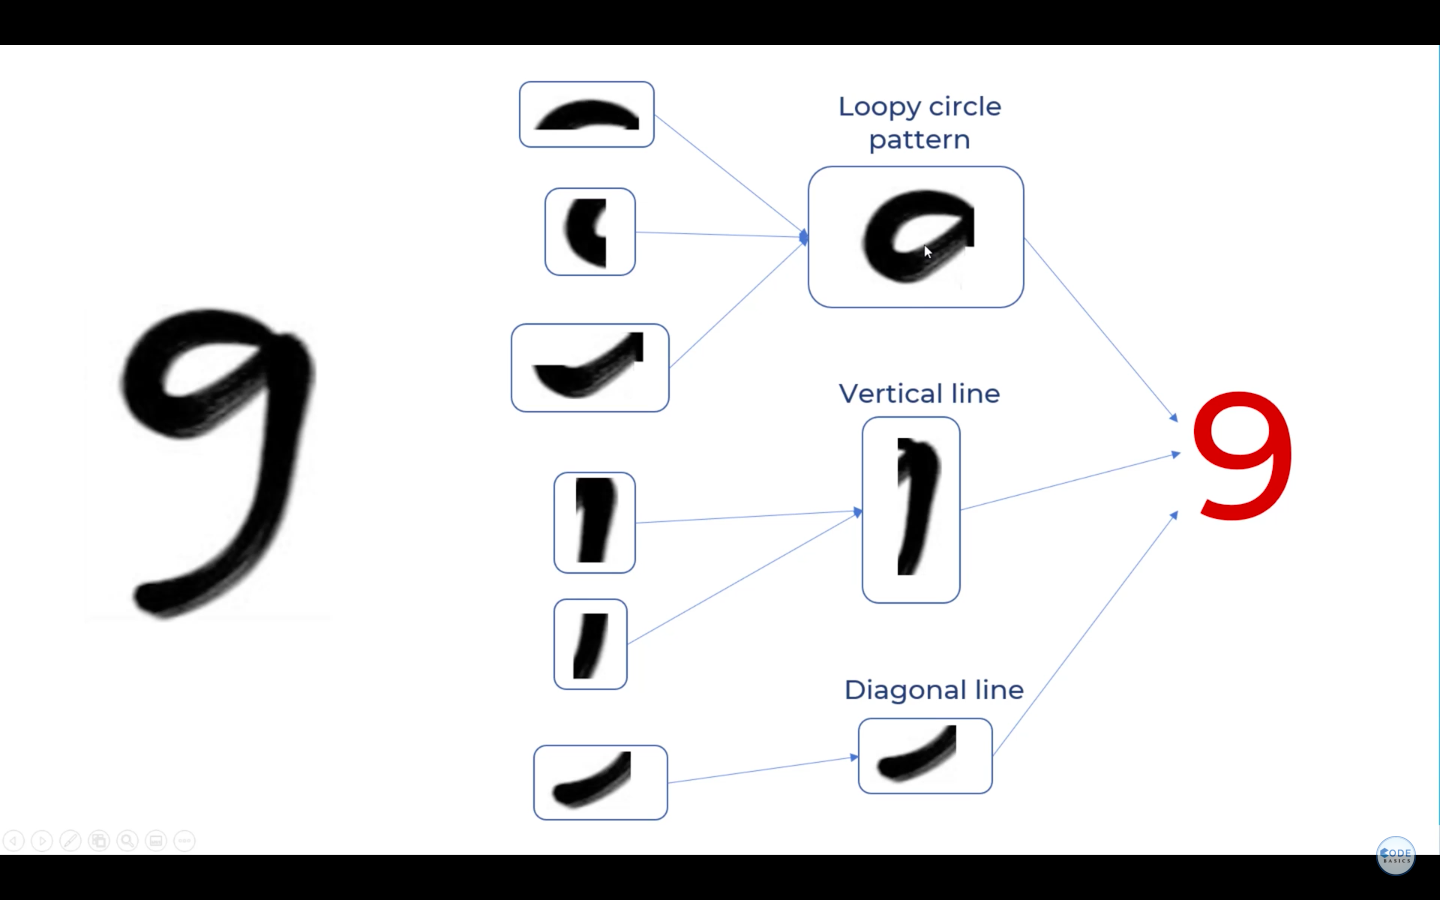

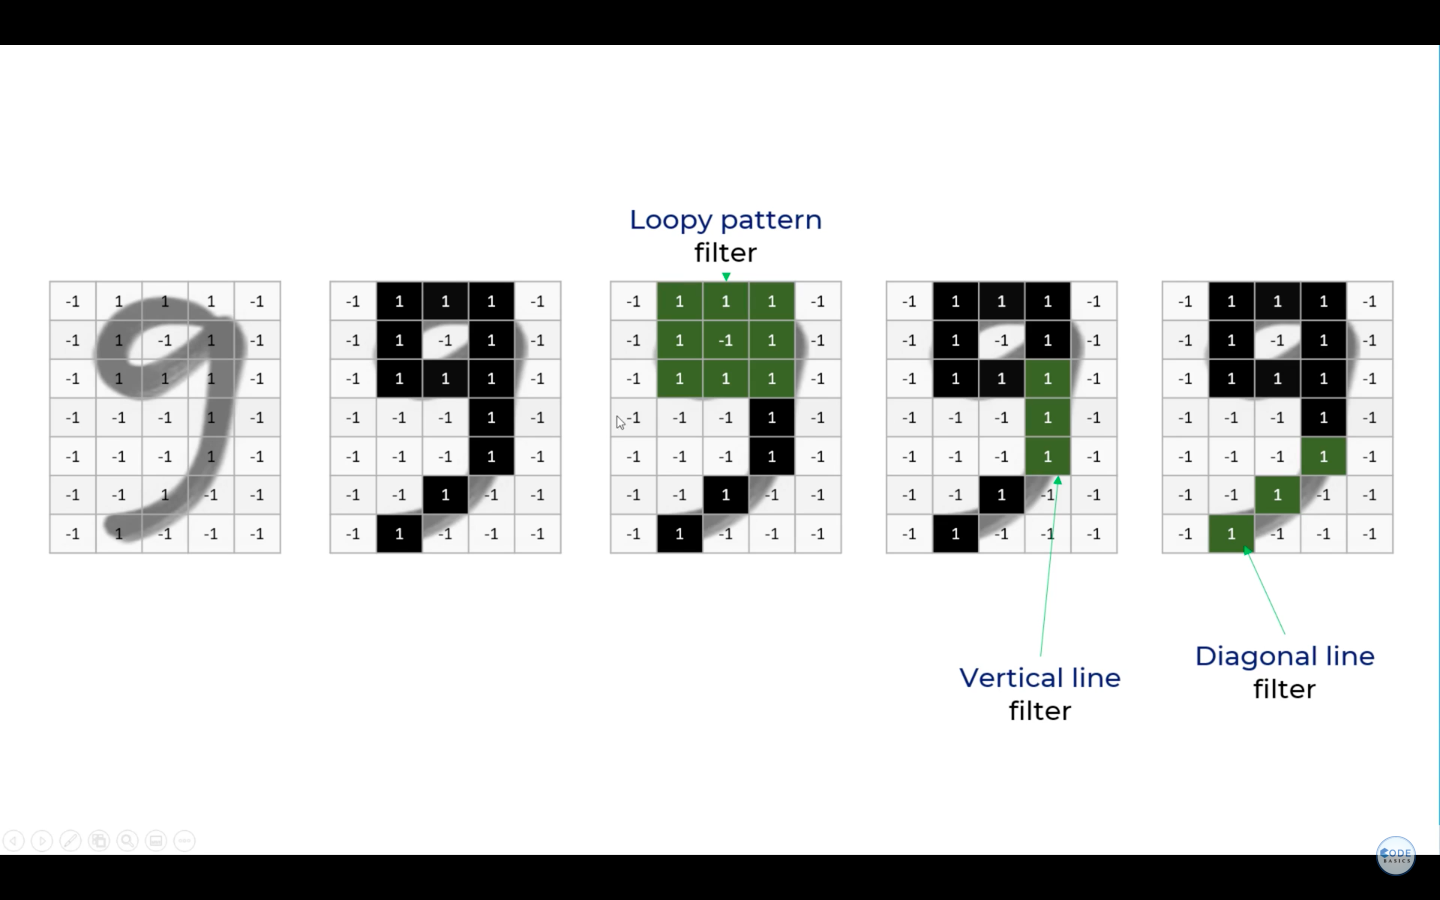

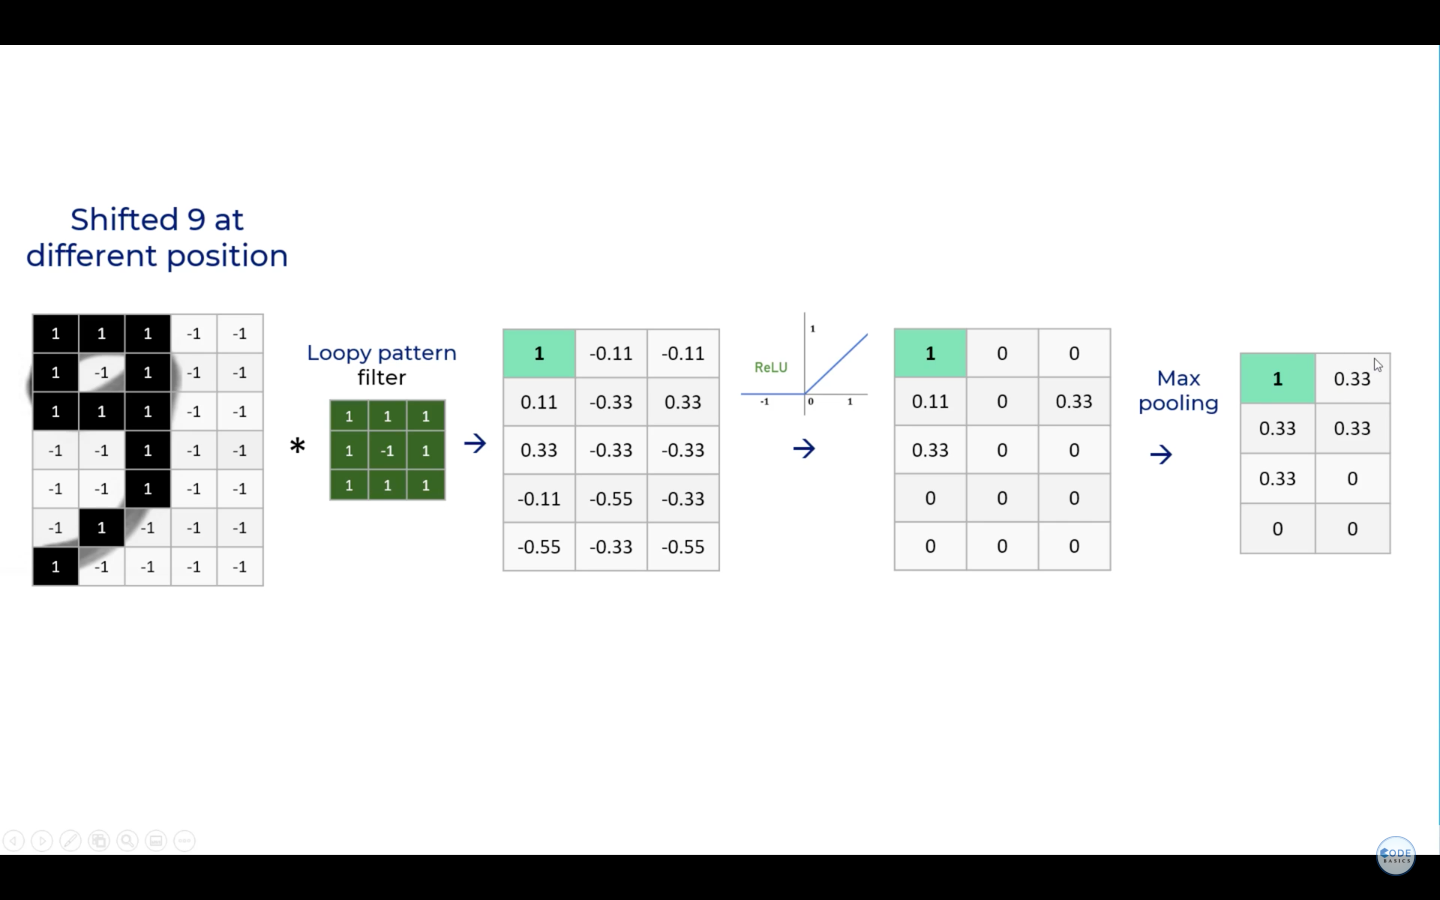

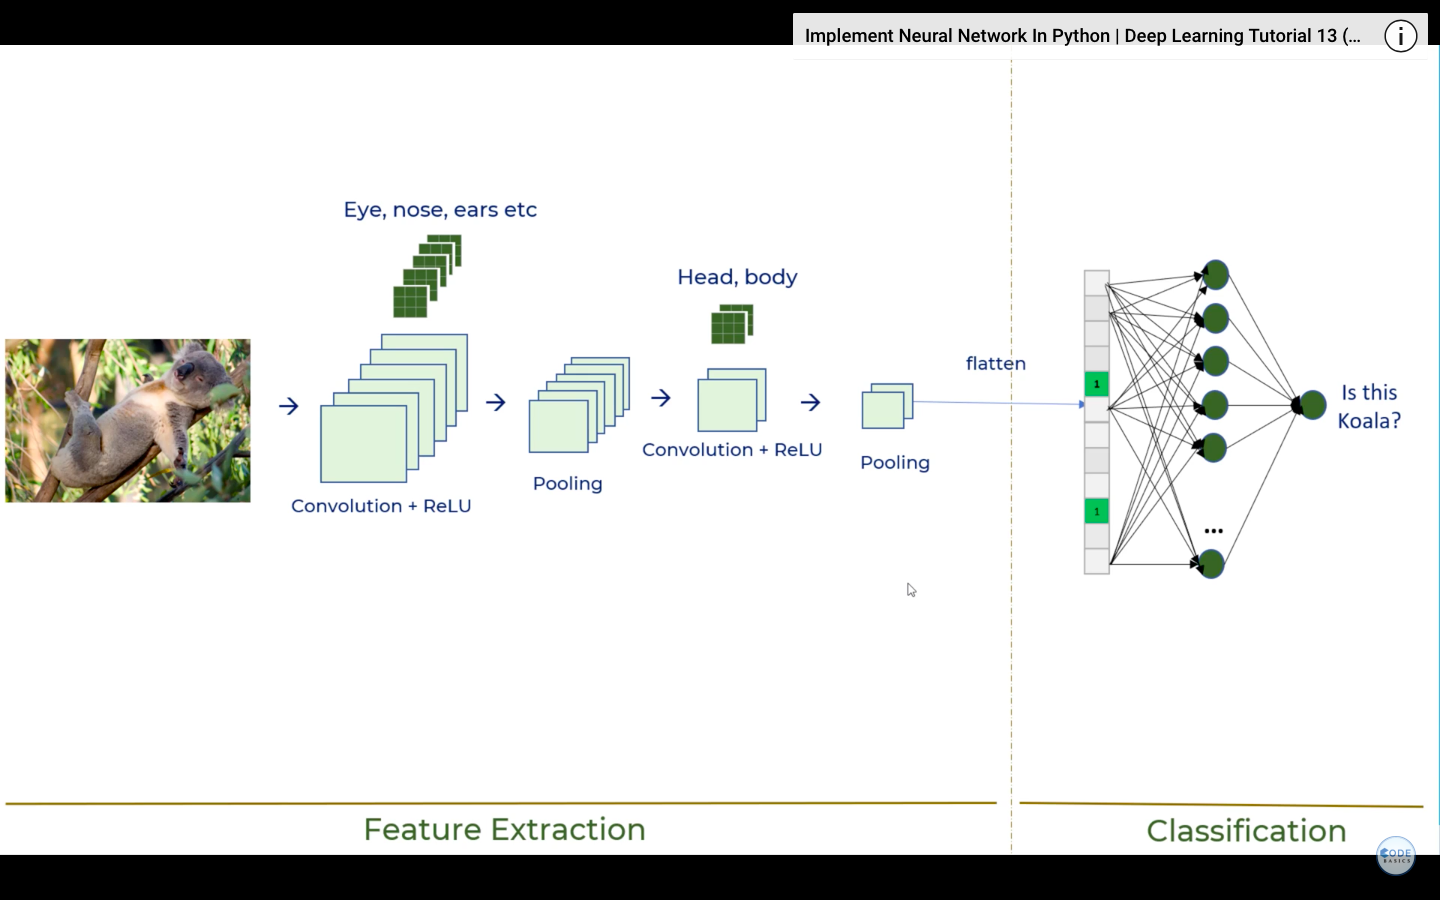

# Small Image Classification Using Convolutional Neural Network (CNN)

### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification


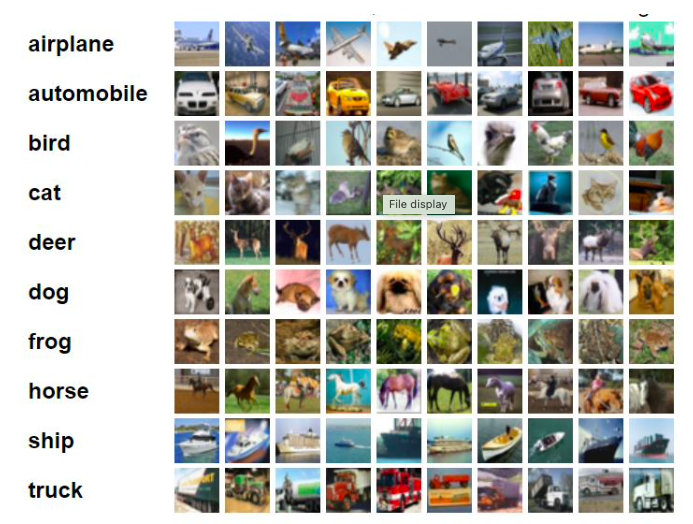

In [104]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [106]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [107]:
X_train.shape

# 50000 = number of rows
# 32 X 32 = image size
# 3  = color code 'rbg'

(50000, 32, 32, 3)

In [108]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

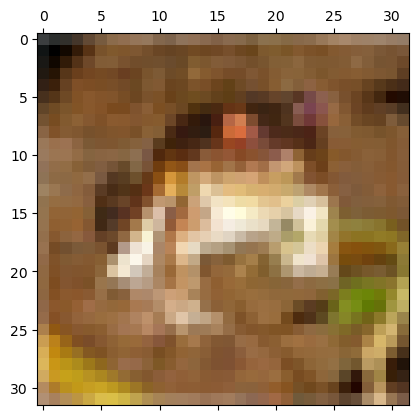

In [109]:
import matplotlib.pyplot as plt

plt.matshow(X_train[0])

# you can use this too fot image plt.imshow(X_train[0])


## For more visulaziation, we will add image name under the image

In [114]:
## y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [117]:
# converted to 1D aray
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [119]:
# same for test sample
# converted to 1D aray
y_test = y_test.reshape(-1,)

In [121]:
# Let's plot some images to see what they are

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

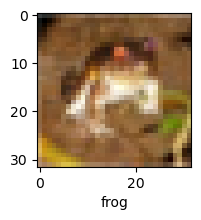

In [123]:
plot_sample(X_train, y_train, 0)

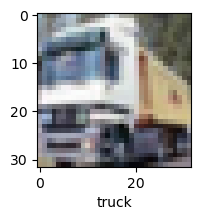

In [125]:
plot_sample(X_train, y_train, 1)


## Normalizing the training data

#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [128]:
X_train = X_train/255.0
X_test = X_test/255.0
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

### Build simple artificial neural network for image classification

In [96]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

ann.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.1209 - loss: 2.3013
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.1317 - loss: 2.2997
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.1406 - loss: 2.2989
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 87ms/step - accuracy: 0.1340 - loss: 2.2979
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.1528 - loss: 2.2968


In [100]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1958 - loss: 2.2953


[2.2953879833221436, 0.19740000367164612]

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [133]:
print(classification_report(y_pred,y_test))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [137]:
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.10      0.67      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.17      0.62      0.27      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.13     10000
   macro avg       0.03      0.13      0.04     10000
weighted avg       0.03      0.13      0.04     10000



/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Now let us build a convolutional neural network to train our images

In [148]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [150]:
cnn.compile(
           optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy']
           )


In [152]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.3857 - loss: 1.6777
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 34ms/step - accuracy: 0.5989 - loss: 1.1444
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6601 - loss: 0.9792
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6899 - loss: 0.8927
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7155 - loss: 0.8181


In [154]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6835 - loss: 0.9163


[0.9248701930046082, 0.6814000010490417]

#### With CNN, at the end 5 epochs, accuracy was at around 60% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [158]:
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [164]:
y_pred[:5]

array([[4.83320981e-01, 6.43126667e-03, 4.27041436e-03, 6.94867969e-03,
        5.93976397e-03, 1.15922466e-02, 2.45671812e-03, 7.95581657e-03,
        3.52110475e-01, 1.18973598e-01],
       [2.73410201e-01, 7.54195789e-04, 1.15490213e-04, 1.10056593e-04,
        6.08386981e-05, 2.16218104e-04, 3.31009687e-05, 2.94339145e-04,
        6.10940039e-01, 1.14065558e-01],
       [3.13696235e-01, 1.19792076e-03, 2.08779878e-04, 3.25265020e-04,
        1.46664999e-04, 4.73822554e-04, 1.15617084e-04, 6.46619126e-04,
        5.56320965e-01, 1.26868084e-01],
       [4.56735134e-01, 5.64642658e-04, 1.73805282e-04, 2.23908442e-04,
        1.19342687e-04, 4.83417476e-04, 5.68060459e-05, 4.07307816e-04,
        4.50724453e-01, 9.05111209e-02],
       [4.64505017e-01, 6.76511414e-03, 1.16632245e-02, 1.69257428e-02,
        1.37139522e-02, 2.64612399e-02, 5.38352691e-03, 1.76948663e-02,
        3.34357113e-01, 1.02530085e-01]], dtype=float32)

In [174]:
y_classes = [np.argmax(element) for element in y_pred_cnn]
y_classes[:5]

[3, 8, 8, 0, 4]

In [176]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

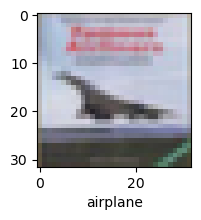

In [178]:
plot_sample(X_test, y_test,3)

In [182]:
classes[y_classes[3]]

'airplane'

# Exercise
### Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

#### Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link:

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [102]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [104]:
y_train.shape

(60000,)

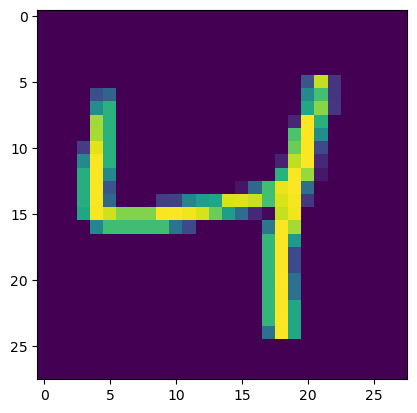

In [106]:
plt.imshow(X_train[2])

In [108]:
y_train[2]

4

In [110]:
X_train[0].shape

(28, 28)

In [112]:
X_train = X_train/255
X_test = X_test/255

## Using ANN Classification

In [116]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8719 - loss: 0.4394
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9602 - loss: 0.1327
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9729 - loss: 0.0922
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0485


In [122]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1040


[0.0884256660938263, 0.9735999703407288]

In [133]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [135]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## Using CNN for classification

In [141]:
cnn = keras.Sequential([
    
    layers.Conv2D(30,(3,3),activation = 'relu',input_shape=(28, 28,1)),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [143]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [145]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9065 - loss: 0.3097
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9835 - loss: 0.0548
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9896 - loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9930 - loss: 0.0224
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9950 - loss: 0.0162


In [147]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9783 - loss: 0.0707


[0.05735298618674278, 0.9828000068664551]

In [149]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [173]:
np.argmax(y_pred[28])

0

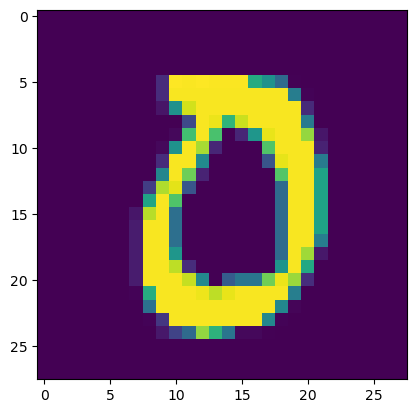

In [175]:
plt.imshow(X_test[28])

#### we can see it has 98.2 % which more than ann 97.3 % and also predicting all them right.

input_shape=(28, 28, 1)


#### 1. Input Layer   ---- >  input_shape=(28, 28, 1)
> 28 × 28: The input image size (like in the MNIST dataset).
> The number of channels (grayscale images have only one channel).




####  2. Convolutional Layer    ------> layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1))
> 30 filters: The number of convolutional filters (features the network learns).
> (3,3) kernel size: The size of each filter (small sliding windows moving over the image).
> ReLU activation: Removes negative values to introduce non-linearity.
> input_shape=(28, 28, 1): Specifies the shape of the input image (only needed in the first layer).
> For input (28, 28, 1), the output will be (26, 26, 30) (since a (3,3) filter reduces height & width by 2).




####  3. Max Pooling Layer   ------> layers.MaxPool2D((2,2))
> (2,2) pooling size: Reduces the image size by taking the maximum value in 2×2 regions.
> Purpose: Reduces computational cost & helps prevent overfitting.
💡 Output shape after this layer:
> Input (26, 26, 30) → Output (13, 13, 30)



####  4. Flatten Layer -----> keras.layers.Dense(100, activation='relu')
> 100 neurons: A hidden layer with 100 neurons.
> ReLU activation: Adds non-linearity to help learn complex patterns.

####  -----> keras.layers.Dense(10, activation='sigmoid')
> 10 neurons: The number of output classes (digits 0-9).
> Sigmoid activation: Outputs a probability for each class (values between 0 and 1).


### NOTE: For multi-class classification, softmax is usually preferred instead of sigmoid, as it ensures probabilities sum to 1.
